In [2]:
import cv2 
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = []
file_name='labels.txt'
with open(file_name, 'rt' ) as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000185618FA8D0>

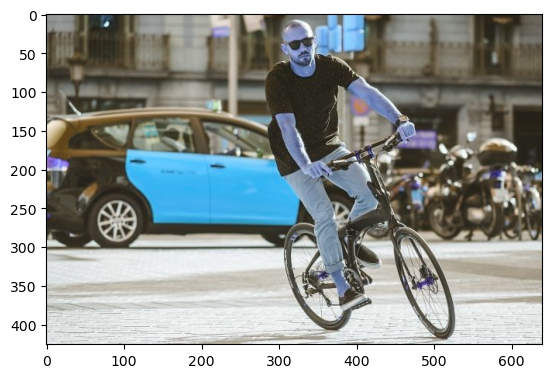

In [9]:
img = cv2.imread("D:\\Rana Nafees Here@\\Rana Nafees Files\\New folder\\Man_pic.jpg")
plt.imshow(img)

In [10]:
ClassIndex, confidence, bbox= model.detect(img, confThreshold= 0.5 )

In [11]:
print(ClassIndex)

[3 2 2 2 2 1 2]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 0, 255), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, (0, 255, 0), 3)


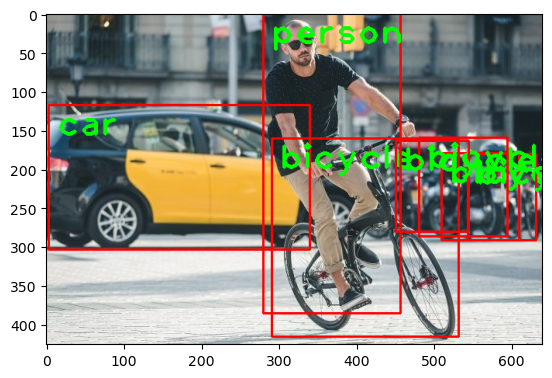

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

##### For Video

In [14]:
cap = cv2.VideoCapture("D:\\Rana Nafees Here@\\Rana Nafees Files\\New folder\\Plots\\pexels_videos_1721294 (1080p).mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')
    
font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if len(ClassIndex) > 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (0, 0, 255), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font, font_scale, (0, 255, 0), 3)
        
    cv2.imshow('Objdetection by Nafees', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
         break
        
cap.release()
cv2destroyallWindows()

            

()
()
[62 62]
[14]
[6]
[6]
[6 6]
[6 8]
[6]
[6 8 3 6 3]
[6 8]
[6 3 6 3 3]
[6 6 3 6 3]
[6 6 3 3 8 3]
[6 6 3 6 8 3 3]
[6 6 3 6 3 3]
[6 6 3 6 3 3]
[6 8 3 3 3 6 3]
[6 8 3 3 1 6 3]
[6 3 1 3 6 1 8 3 3]
[6 2 1 6 1 6 3 1 3]
[6 6 1 6 1 1 3 2 6 8]
[6 6 1 1 1 2 3 6 3 6]
[6 6 1 1 1 6 6 8 2 1 3 3 3]
[6 1 1 3 8 1 6 1 3]
[ 6  1  1  1  8  3  6  3  1  3 10  2]
[ 1  6  6  1  1  2  3  1  6  2 10]
[ 6  1  1  1  1  3  1  6  1  2 10  3]
[6 1 1 3 3 1 1 1 1]
[6 1 3 3 2 8 3 1 3]
[6 8 1 3 2 6 6 2 3]
[6 8 6 6 2 1 2 3]
[6 8 1 6 1 2 6 3]
[6 1 8 2 3]
[6 8 6 3 3 1]
[6 8 3 3]
[ 6  3  8  3 19  3]
[6 3 8 3 6 3]
[6 8 3 3]
[6 8 3 3 8]
[6 3 3 8 8]
[6 8 3 6 3 8 6 3]
[6 8 3 6 6 3]
[6 8 3 6 3 3]
[6 3 3 8 6 3]
[6 8 3 6 3]
[6 6 3 8 3 6 8 1 6]
[6 3 8 6 3 3]
[6 3 8 1 1 3 6 3 6]
[6 3 8 1 1 1 6 1 3 3 6]
[6 3 1 3 8 1]
[6 3 1 6 8 1 8]
[6 3 6 6 1 3 1 1]
[6 3 1 6 6 1 6 3 6 1 3]
[6 3 1 6 1 1 3 6 6]
[6 1 3 6 1 1 3]
[6 1 6 3 1 6 6 1]
[6 3 1 1 6 1 6 1]
[6 3 6 1 1 1 6]
[6 3 1 1 1 6 1 1]
[6 3 1 6 1 1 3]
[6 3 1 1 1 6 1 1 3]
[6 3 1 6 1 1 3]
[6

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [14]:
from gtts import gTTS


In [15]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
from playsound import playsound

In [ ]:
import cv2
from gtts import gTTS
from cvlib.object_detection import draw_bbox, detect_common_objects
import playsound

def speech(text):
    print(text)
    language = "en"
    output = gTTS(text=text, lang=language, slow=False)
    
    output.save("output.mp3")
    playsound.playsound("output.mp3")

video = cv2.VideoCapture(0)  # Use camera index 0

labels = []

while True:
    ret, frame = video.read()
    
    if not ret:
        continue  # Skip frames with issues
    
    bbox, label, conf = detect_common_objects(frame)
    output_image = draw_bbox(frame, bbox, label, conf)
    
    cv2.imshow("Object Detection", output_image)
    
    for item in label:
        if item in labels:
            pass
        else:
            labels.append(item)
        
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

i = 0
new_sentence = []
for label in labels:
    if i == 0:
        new_sentence.append(f"I found a {label}, and, ")
    else:
        new_sentence.append(f"a {label}")
        
    i += 1

speech("".join(new_sentence))

cv2.destroyAllWindows()
video.release()


#### Worked By :M. Nafees Khawar